<h1 align="center"> Thermal Images CNN Feature Extraction</h1>

### Importing Dependencies

In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt
import cv2
from random import randint               
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential  
import tensorflow as tf
from tqdm import tqdm

### Keras Version

In [2]:
import keras
keras.__version__

'2.4.3'

### Class Categories 

In [3]:
class_names = ['NH', 'NL', 'PH', 'PL']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)
IMAGE_SIZE = (120, 120)

### Import CNN model

In [4]:
from keras.models import load_model
model = load_model('fer_model_f1.h5')
model.summary()  # As a reminder.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 120, 120, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

### Test Sample

In [5]:
img_path = 'sample/PH_416.jpg'

In [6]:
from keras.preprocessing import image
import numpy as np
import cv2 

IMAGE_SIZE = (120,120)
# Image filters for sharpening
filters = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# Image Processing with OpenCV
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, IMAGE_SIZE)
img = cv2.filter2D(img,-1, filters)
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

In [7]:
# Its shape is (1, 120, 120, 3)
print(img_tensor.shape)

(1, 120, 120, 3)


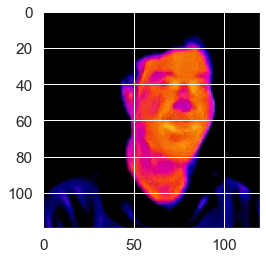

In [8]:
# Showing Imported Image
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [9]:
predictions = model.predict(img_tensor)

In [10]:
predictions[0]

array([0.5887134 , 0.0016979 , 0.4063529 , 0.00323585], dtype=float32)

In [11]:
a = predictions[0]
print(a)
print(a[0])

[0.5887134  0.0016979  0.4063529  0.00323585]
0.5887134


In [12]:
np.argmax(predictions)

0

In [13]:
# Sort the prediction from leat to greatest
list_index = [0,1,2,3]
x = predictions

for i in range(4):
    for j in range(4):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp

# Show the sorted labels in order
print(list_index)

[0, 2, 3, 1]


In [14]:
# Print the first 5 predictions
for i in range(4):
    print(class_names[list_index[i]], ':', round(predictions[0][list_index[i]] * 100,2), '%')

NH : 58.87 %
PH : 40.64 %
PL : 0.32 %
NL : 0.17 %


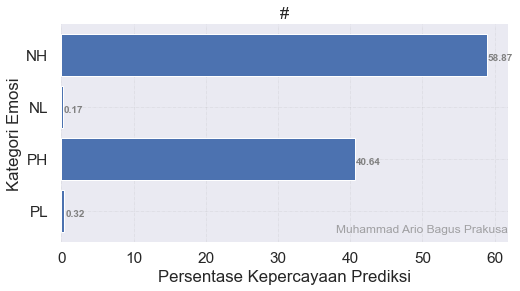

In [15]:
import pandas as pd
from matplotlib import pyplot as plt

values = predictions[0]*100

# Figure Size
fig, ax = plt.subplots(figsize =(8, 4))

# Horizontal Bar Plot
ax.barh(class_names, values)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 3)
ax.yaxis.set_tick_params(pad = 7)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
linestyle ='-.', linewidth = 0.5,
alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('#',
 loc ='center', )

# Add Text watermark
fig.text(0.9, 0.15, 'Muhammad Ario Bagus Prakusa', fontsize = 12,
color ='grey', ha ='right', va ='bottom',
alpha = 0.7)

plt.ylabel('Kategori Emosi')
plt.xlabel('Persentase Kepercayaan Prediksi')
# Show Plot
plt.show()

### CNN Feature Extraction

In [16]:
from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [17]:
# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

In [18]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 120, 120, 32)


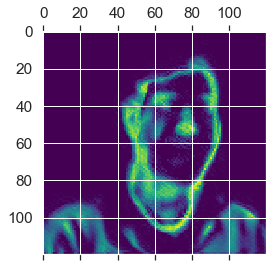

In [19]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')
plt.show()

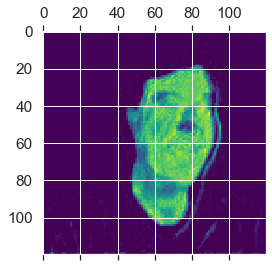

In [20]:
plt.matshow(first_layer_activation[0, :, :, 5], cmap='viridis')
plt.show()

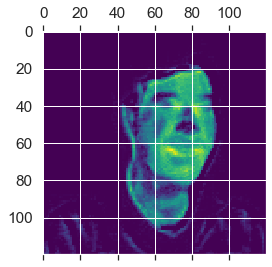

In [21]:
plt.matshow(first_layer_activation[0, :, :, 10], cmap='viridis')
plt.show()

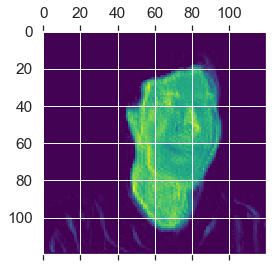

In [22]:
plt.matshow(first_layer_activation[0, :, :, 15], cmap='viridis')
plt.show()

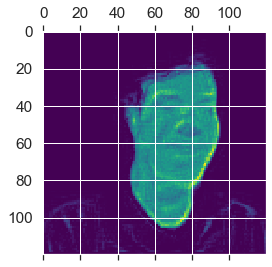

In [23]:
plt.matshow(first_layer_activation[0, :, :, 20], cmap='viridis')
plt.show()

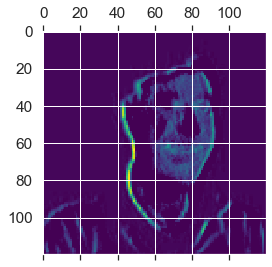

In [24]:
plt.matshow(first_layer_activation[0, :, :, 25], cmap='viridis')
plt.show()

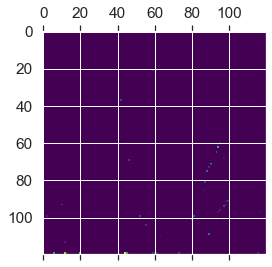

In [25]:
plt.matshow(first_layer_activation[0, :, :, 30], cmap='viridis')
plt.show()

<ipython-input-26-e3d64939df4d>:30: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


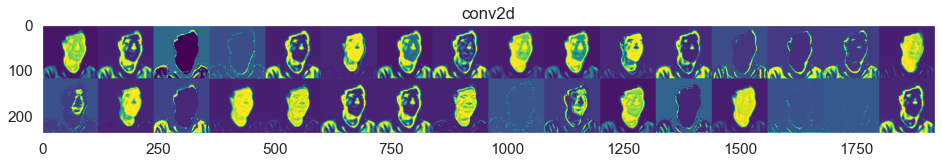

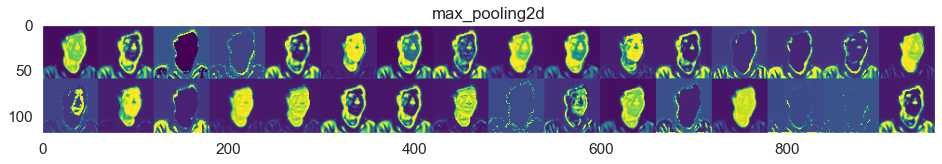

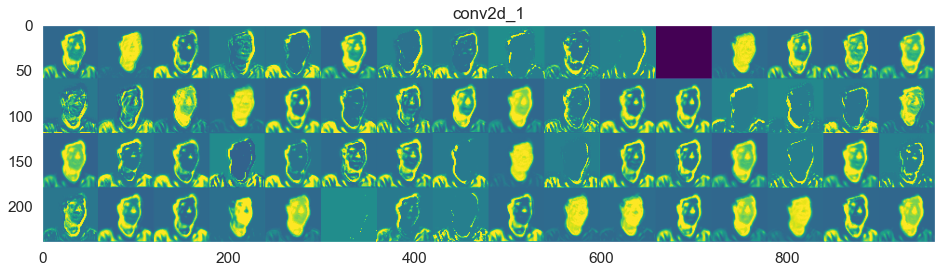

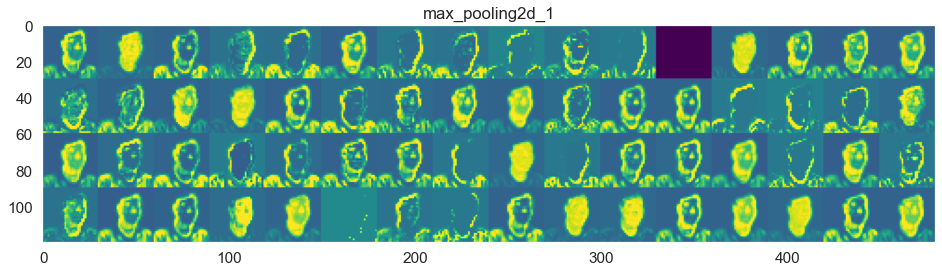

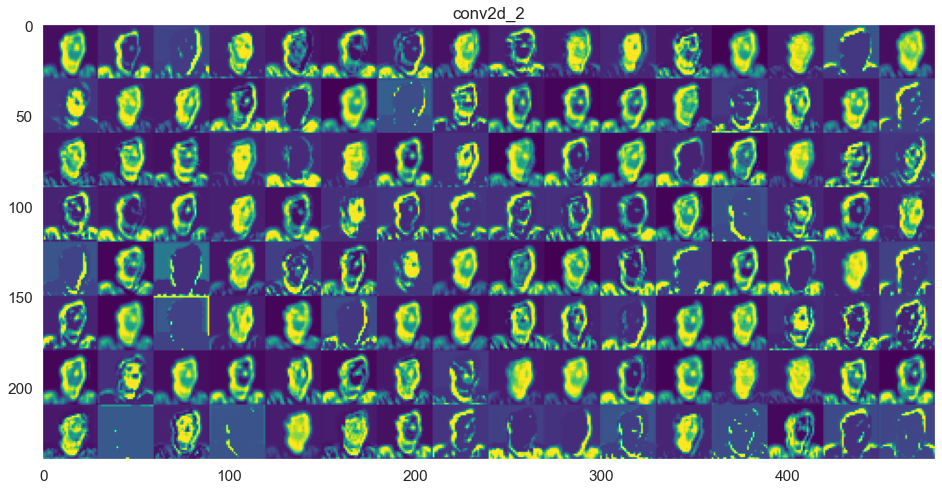

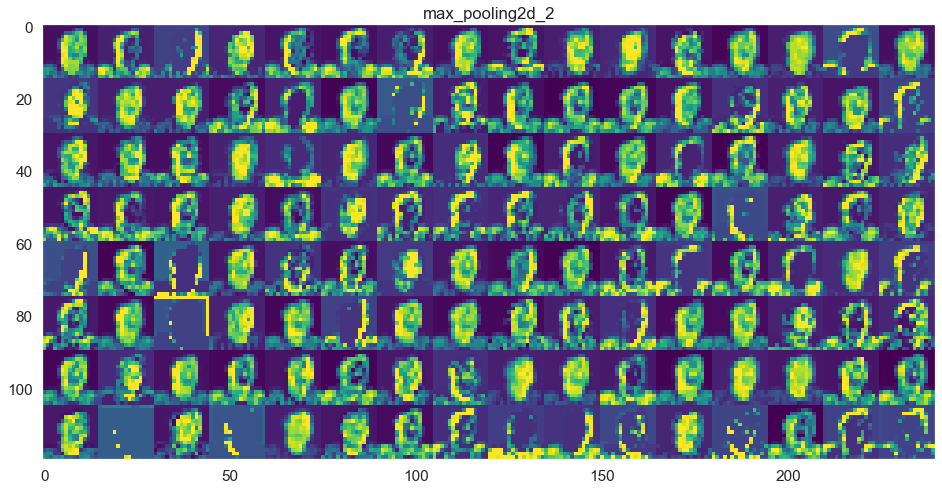

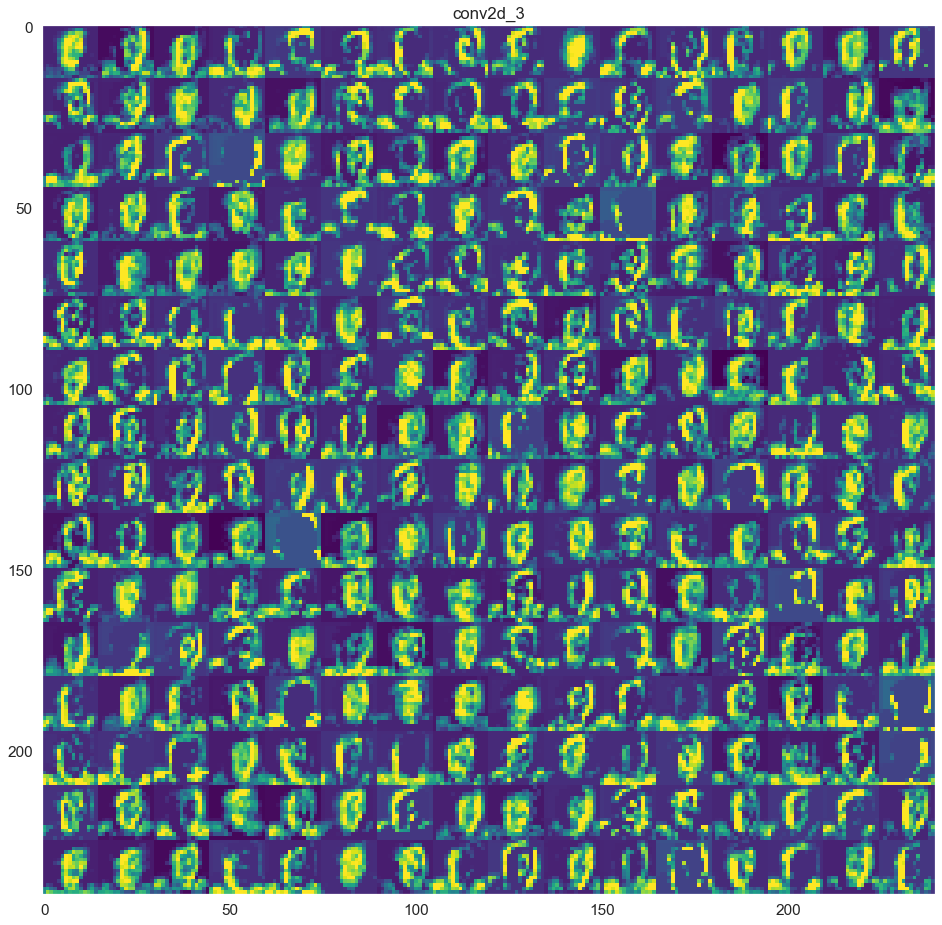

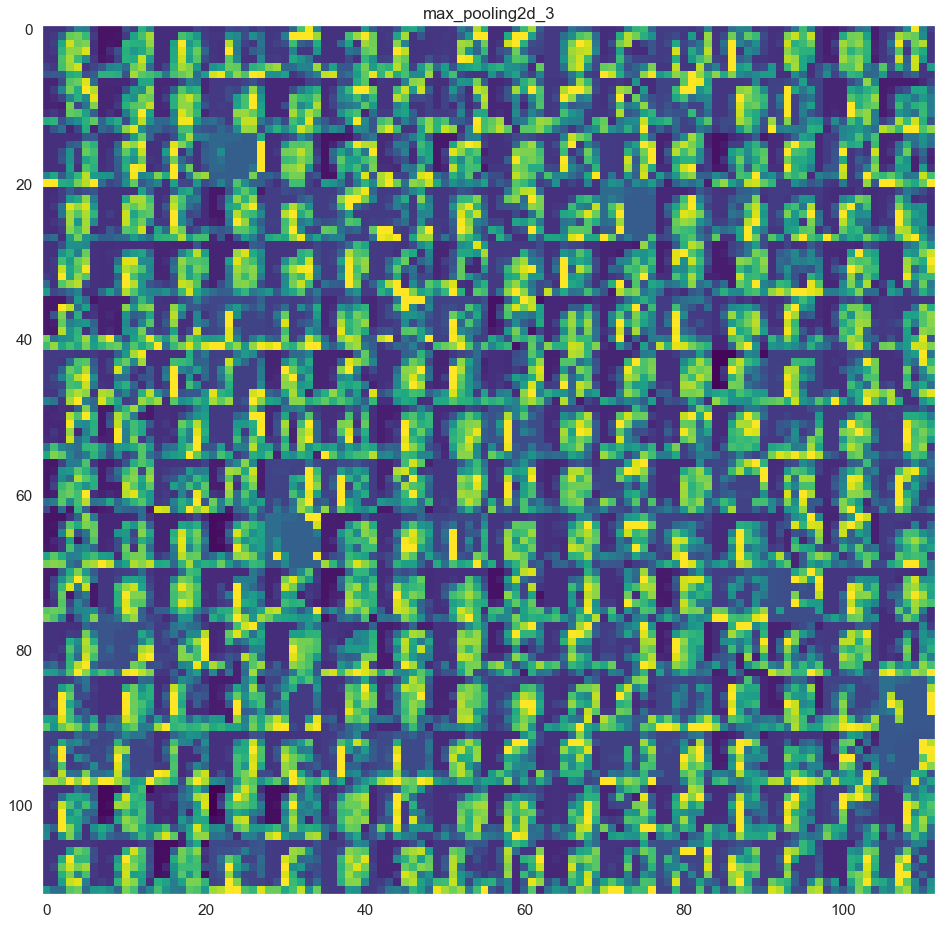

In [26]:
import keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

In [27]:
# End Of Code